**Vehicle operation analysis**
<a id='3_vehicle_operation_analysis'></a>

- [Step 1. Import data](#import-data)
- [Step 2. Traffic-volume-and-turning-movement](#traffic-volume-and-turning-movement)
    - [(1) Total volume and turning movement](#total-volume-and-turning-movement)
    - [(2) Peak hour and turning movement](#peak-hour-and-turning-movement)  
        - [Peak hour for the intersection](#peak-hour-for-the-intersection)
        - [Peak hour for each direction](#peak-hour-for-each-direction)
- [Step 3. Speed analysis](#speed-analyis) 
- [Step 4. Level-of-Service](#level-of-service) 
- [Step 5. Pedestrian gap analysis](#pedestrian gap analysis) 

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import data

<a id='import-data'></a>
[[back to top](#3_vehicle_operation_analysis)]

<mark>User input: Type the name of the location to be analyzed</mark>

The location name will show on the figures of the crash analysis results.

In [2]:
LocationName = 'Demo Intersection'

<mark>User input: Save the Miovision (traffic counts) Excel sheet in the **source_data** folder </mark>

In [3]:
# Find the target xlsx file
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "/source_data/*.xlsx"))
for f in csv_files:
    print(f.split('\\')[-1])

<mark>User input: Select the excel sheet to be analyzed</mark>

In [4]:
file_name = 'MiovisionCounts.xlsx'

In [5]:
# List the collection of worksheets
path = './source_data/'+file_name
xl = pd.ExcelFile(path)
xl.sheet_names 

['Summary',
 'Lights',
 'Single-Unit Trucks',
 'Articulated Trucks',
 'Buses',
 'Pedestrians',
 'Bicycles on Road',
 'Bicycles on Crosswalk',
 'Total Volume Class Breakdown',
 'AM Peak Class Breakdown',
 'Midday Peak Class Breakdown',
 'PM Peak Class Breakdown']

In [6]:
# Volume of different types of vehicles/pedestrians/bicycles
Lights = pd.read_excel(path, sheet_name='Lights',index_col=0,header=[0,1,2])
Single_Unit_Trucks = pd.read_excel(path, sheet_name='Single-Unit Trucks',index_col=0,header=[0,1,2])
Articulated_Trucks = pd.read_excel(path, sheet_name='Articulated Trucks',index_col=0,header=[0,1,2])
Buses = pd.read_excel(path, sheet_name='Buses',index_col=0,header=[0,1,2])

Pedestrians = pd.read_excel(path, sheet_name='Pedestrians',index_col=0,header=[0,1,2])
Bicycles_on_Road = pd.read_excel(path, sheet_name='Bicycles on Road',index_col=0,header=[0,1,2])
Bicycles_on_Crosswalk = pd.read_excel(path, sheet_name='Bicycles on Crosswalk',index_col=0,header=[0,1,2])

Total_Volume_Class_Breakdown = pd.read_excel(path, sheet_name='Total Volume Class Breakdown',index_col=0,header=[0,1,2])
AM_Peak_Class_Breakdown = pd.read_excel(path, sheet_name='AM Peak Class Breakdown',index_col=0,header=[0,1,2])
Midday_Peak_Class_Breakdown = pd.read_excel(path, sheet_name='Midday Peak Class Breakdown',index_col=0,header=[0,1,2])
PM_Peak_Class_Breakdown = pd.read_excel(path, sheet_name='PM Peak Class Breakdown',index_col=0,header=[0,1,2])

In [7]:
print('Traffic data collection starts at',Total_Volume_Class_Breakdown.index[0])

Traffic data collection starts at 2021-09-23 07:00:00


<Mark> User input: Enter the start time and end time that you want to plot </Mark>

In [8]:
start_time = '2021-09-23 07:00:00'
end_time = '2021-09-23 18:45:00'

In [9]:
start_idx = Total_Volume_Class_Breakdown.index.get_loc(start_time)
end_idx = Total_Volume_Class_Breakdown.index.get_loc(end_time)

# Step 2: Traffic volume and turning movement

<a id='traffic-volume-and-turning-movement'></a>
[[back to top](#3_vehicle_operation_analysis)]

## (1) Total volume and turning movement
<a id='total-volume-and-turning-movement'></a>
[[back to top](#3_vehicle_operation_analysis)]

<Mark> Comment out or skip if the direction does not exist </Mark>

For example, if there is only north leg, east leg, and south leg, then skip the cell of the west leg (cell 14).

In [10]:
df = Total_Volume_Class_Breakdown

In [11]:
direction = ('North', 'Southbound', 'App Total')
Sum_North_Southbound = df.iloc[start_idx:end_idx+1,df.columns.get_loc(direction)]

In [12]:
direction = ('East',  'Westbound', 'App Total')
Sum_East_Westbound = df.iloc[start_idx:end_idx+1,df.columns.get_loc(direction)]

In [13]:
direction = ('South', 'Northbound', 'App Total')
Sum_South_Northbound = df.iloc[start_idx:end_idx+1,df.columns.get_loc(direction)]

In [14]:
direction = ('West',  'Eastbound', 'App Total')
Sum_West_Eastbound = df.iloc[start_idx:end_idx+1,df.columns.get_loc(direction)]

Text(0.5, 1.05, 'Vehicle Traffic Volume at the \nDemo Intersection')

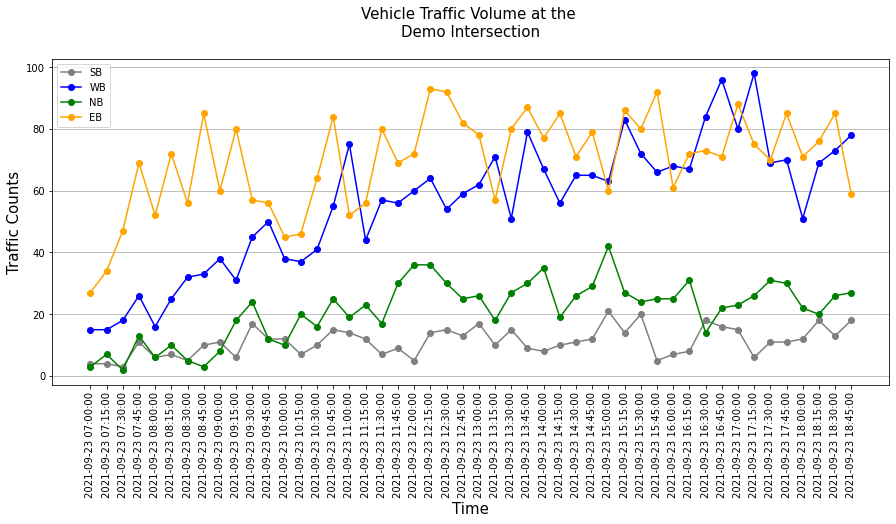

In [15]:
fig, ax = plt.subplots(figsize = (15,6))

plt.plot(np.arange(len(Sum_North_Southbound)),Sum_North_Southbound, linestyle='-', marker='o', color='grey')
plt.plot(np.arange(len(Sum_East_Westbound)),Sum_East_Westbound, linestyle='-', marker='o', color='blue')
plt.plot(np.arange(len(Sum_South_Northbound)),Sum_South_Northbound, linestyle='-', marker='o', color='green')
plt.plot(np.arange(len(Sum_West_Eastbound)),Sum_West_Eastbound, linestyle='-', marker='o', color='orange')

plt.xlabel('Time',fontsize=15)
plt.xticks(np.arange(len(Sum_North_Southbound.index)),Sum_North_Southbound.index,rotation=90)
plt.ylabel('Traffic Counts',fontsize=15) 
plt.legend(['SB','WB','NB','EB']) 

ax.patch.set_facecolor('white')
ax.patch.set_alpha(0.1)
plt.grid(axis='y')
plt.title('Vehicle Traffic Volume at the \n'+LocationName, y=1.05,fontsize=15)

In [16]:
# Tuning movement in 12 hours
Total_Volume_Class_Breakdown.iloc[start_idx:end_idx+1,:].sum()

Leg    Direction   Start Time
North  Southbound  Right          247.0
                   Thru           169.0
                   Left           116.0
                   U-Turn           2.0
                   App Total      534.0
                   Peds CW       2249.0
                   Peds CCW      2444.0
East   Westbound   Right          187.0
                   Thru          2365.0
                   Left           134.0
                   U-Turn           1.0
                   App Total     2687.0
                   Peds CW        574.0
                   Peds CCW       508.0
South  Northbound  Right          386.0
                   Thru           464.0
                   Left           173.0
                   U-Turn           0.0
                   App Total     1023.0
                   Peds CW       2394.0
                   Peds CCW      2240.0
West   Eastbound   Right          194.0
                   Thru          2956.0
                   Left           198.0
          

## (2) Peak hour and turning movement
<a id='peak-hour-and-turning-movement'></a>
[[back to top](#3_vehicle_operation_analysis)]

### Peak hour for the intersection 
<a id='peak-hour-for-the-intersection'></a>
[[back to top](#3_vehicle_operation_analysis)]

In [17]:
AM_Peak_Start = AM_Peak_Class_Breakdown.index[0]
print('Peak Hours: \n',
     'AM Peak starts at',AM_Peak_Class_Breakdown.index[0],'\n',
     'Midday Peak starts at',Midday_Peak_Class_Breakdown.index[0],'\n',
     'PM Peak starts at',PM_Peak_Class_Breakdown.index[0])

Peak Hours: 
 AM Peak starts at 2021-09-23 10:00:00 
 Midday Peak starts at 2021-09-23 12:00:00 
 PM Peak starts at 2021-09-23 16:30:00


In [18]:
AM_Peak_Class_Breakdown.iloc[0:4,:].sum()

Leg    Direction   Start Time
North  Southbound  Right          24.0
                   Thru            8.0
                   Left           11.0
                   U-Turn          1.0
                   App Total      44.0
                   Peds CW       163.0
                   Peds CCW      120.0
East   Westbound   Right           7.0
                   Thru          152.0
                   Left           12.0
                   U-Turn          0.0
                   App Total     171.0
                   Peds CW        40.0
                   Peds CCW       30.0
South  Northbound  Right          28.0
                   Thru           27.0
                   Left           16.0
                   U-Turn          0.0
                   App Total      71.0
                   Peds CW       108.0
                   Peds CCW      175.0
West   Eastbound   Right          14.0
                   Thru          215.0
                   Left           10.0
                   U-Turn         

In [19]:
Midday_Peak_Class_Breakdown.iloc[0:4,:].sum()

Leg    Direction   Start Time
North  Southbound  Right          18.0
                   Thru           17.0
                   Left           11.0
                   U-Turn          1.0
                   App Total      47.0
                   Peds CW       296.0
                   Peds CCW      287.0
East   Westbound   Right          23.0
                   Thru          199.0
                   Left           15.0
                   U-Turn          0.0
                   App Total     237.0
                   Peds CW        75.0
                   Peds CCW       72.0
South  Northbound  Right          46.0
                   Thru           56.0
                   Left           25.0
                   U-Turn          0.0
                   App Total     127.0
                   Peds CW       308.0
                   Peds CCW      261.0
West   Eastbound   Right          18.0
                   Thru          306.0
                   Left           15.0
                   U-Turn         

In [20]:
PM_Peak_Class_Breakdown.iloc[0:4,:].sum()

Leg    Direction   Start Time
North  Southbound  Right          28.0
                   Thru           15.0
                   Left           12.0
                   U-Turn          0.0
                   App Total      55.0
                   Peds CW       157.0
                   Peds CCW      344.0
East   Westbound   Right          21.0
                   Thru          317.0
                   Left           20.0
                   U-Turn          0.0
                   App Total     358.0
                   Peds CW        49.0
                   Peds CCW       63.0
South  Northbound  Right          38.0
                   Thru           36.0
                   Left           11.0
                   U-Turn          0.0
                   App Total      85.0
                   Peds CW       349.0
                   Peds CCW      230.0
West   Eastbound   Right          24.0
                   Thru          244.0
                   Left           39.0
                   U-Turn         

### Peak hour for each direction
<a id='peak-hour-for-each-direction'></a>
[[back to top](#3_vehicle_operation_analysis)]

Find the AM peak hour and PM peak hour for each direction

In [21]:
df = Total_Volume_Class_Breakdown
sd_time = df.iloc[start_idx:end_idx+1,:]
sd_time.index = pd.to_datetime(sd_time.index)

In [22]:
direction = ('North', 'Southbound', 'App Total')
print('End time of AM Peak Hour and the sum of traffic volumes:') #There might be more than one peak hour
print(sd_time.loc[sd_time.index.hour<=11,direction].rolling(4).sum().sort_values(ascending=False).head(1))
print('End time of Midday Peak Hour and the sum of traffic volumes:') #There might be more than one peak hour
print(sd_time.loc[(sd_time.index.hour>=11)&(sd_time.index.hour<13),direction].rolling(4).sum().sort_values(ascending=False).head(1))
print('End time of PM Peak Hour and the sum of traffic volumes:') #There might be more than one peak hour
print(sd_time.loc[sd_time.index.hour>13,direction].rolling(4).sum().sort_values(ascending=False).head(1))

End time of AM Peak Hour and the sum of traffic volumes:
2021-09-23 11:15:00    51.0
Name: (North, Southbound, App Total), dtype: float64
End time of Midday Peak Hour and the sum of traffic volumes:
2021-09-23 12:45:00    47.0
Name: (North, Southbound, App Total), dtype: float64
End time of PM Peak Hour and the sum of traffic volumes:
2021-09-23 15:30:00    67.0
Name: (North, Southbound, App Total), dtype: float64


In [23]:
direction = ('South', 'Northbound', 'App Total')
print('End time of AM Peak Hour and the sum of traffic volumes:') #There might be more than one peak hour
print(sd_time.loc[sd_time.index.hour<=11,direction].rolling(4).sum().sort_values(ascending=False).head(1))
print('End time of Midday Peak Hour and the sum of traffic volumes:') #There might be more than one peak hour
print(sd_time.loc[(sd_time.index.hour>=11)&(sd_time.index.hour<13),direction].rolling(4).sum().sort_values(ascending=False).head(1))
print('End time of PM Peak Hour and the sum of traffic volumes:') #There might be more than one peak hour
print(sd_time.loc[sd_time.index.hour>13,direction].rolling(4).sum().sort_values(ascending=False).head(1))

End time of AM Peak Hour and the sum of traffic volumes:
2021-09-23 11:45:00    89.0
Name: (South, Northbound, App Total), dtype: float64
End time of Midday Peak Hour and the sum of traffic volumes:
2021-09-23 12:30:00    132.0
Name: (South, Northbound, App Total), dtype: float64
End time of PM Peak Hour and the sum of traffic volumes:
2021-09-23 15:15:00    124.0
Name: (South, Northbound, App Total), dtype: float64


In [24]:
direction = ('East',  'Westbound', 'App Total')
print('End time of AM Peak Hour and the sum of traffic volumes:') #There might be more than one peak hour
print(sd_time.loc[sd_time.index.hour<=11,direction].rolling(4).sum().sort_values(ascending=False).head(1))
print('End time of Midday Peak Hour and the sum of traffic volumes:') #There might be more than one peak hour
print(sd_time.loc[(sd_time.index.hour>=11)&(sd_time.index.hour<13),direction].rolling(4).sum().sort_values(ascending=False).head(1))
print('End time of PM Peak Hour and the sum of traffic volumes:') #There might be more than one peak hour
print(sd_time.loc[sd_time.index.hour>13,direction].rolling(4).sum().sort_values(ascending=False).head(1))

End time of AM Peak Hour and the sum of traffic volumes:
2021-09-23 11:45:00    232.0
Name: (East, Westbound, App Total), dtype: float64
End time of Midday Peak Hour and the sum of traffic volumes:
2021-09-23 12:15:00    237.0
Name: (East, Westbound, App Total), dtype: float64
End time of PM Peak Hour and the sum of traffic volumes:
2021-09-23 17:15:00    358.0
Name: (East, Westbound, App Total), dtype: float64


In [25]:
direction = ('West',  'Eastbound', 'App Total')
print('End time of AM Peak Hour and the sum of traffic volumes:') #There might be more than one peak hour
print(sd_time.loc[sd_time.index.hour<=11,direction].rolling(4).sum().sort_values(ascending=False).head(1))
print('End time of Midday Peak Hour and the sum of traffic volumes:') #There might be more than one peak hour
print(sd_time.loc[(sd_time.index.hour>=11)&(sd_time.index.hour<13),direction].rolling(4).sum().sort_values(ascending=False).head(1))
print('End time of PM Peak Hour and the sum of traffic volumes:') #There might be more than one peak hour
print(sd_time.loc[sd_time.index.hour>13,direction].rolling(4).sum().sort_values(ascending=False).head(1))

End time of AM Peak Hour and the sum of traffic volumes:
2021-09-23 09:30:00    282.0
Name: (West, Eastbound, App Total), dtype: float64
End time of Midday Peak Hour and the sum of traffic volumes:
2021-09-23 12:45:00    339.0
Name: (West, Eastbound, App Total), dtype: float64
End time of PM Peak Hour and the sum of traffic volumes:
2021-09-23 16:00:00    319.0
Name: (West, Eastbound, App Total), dtype: float64


# Step 3: Speed analysis

<a id='speed-analysis'></a>
[[back to top](#3_vehicle_operation_analysis)]

In [26]:
Timekeys_Hour = ['7AM-8AM','8AM-9AM','9AM-10AM','10AM-11AM','11AM-12PM','12PM-1PM','1PM-2PM','2PM-3PM','3PM-4PM','4PM-5PM','5PM-6PM','6PM-7PM']

NB_Avg_Speed = [52,45,47,47,45,44,42,43,45,45,43,44]
SB_Avg_Speed = [48,50,48,48,49,47,48,49,49,49,51,53]
EB_Avg_Speed = [42,37,36,37,38,40,38,40,36,36,39,38]
WB_Avg_Speed = [42,41,43,38,44,42,44,42,40,37,40,38]

In [27]:
print('Mean speed (mph):')
print('NB:',int(np.mean(NB_Avg_Speed)))
print('SB:',int(np.mean(SB_Avg_Speed)))
print('EB:',int(np.mean(EB_Avg_Speed)))
print('WB:',int(np.mean(WB_Avg_Speed)))

Mean speed (mph):
NB: 45
SB: 49
EB: 38
WB: 40


In [28]:
print('85 percentile speed (mph):')
print('NB:',int(np.percentile(NB_Avg_Speed,85)))
print('SB:',int(np.percentile(SB_Avg_Speed,85)))
print('EB:',int(np.percentile(EB_Avg_Speed,85)))
print('WB:',int(np.percentile(WB_Avg_Speed,85)))

85 percentile speed (mph):
NB: 47
SB: 50
EB: 40
WB: 43


Text(0.5, 1.05, '12 Hours Average Travel Speed at the \nDemo Intersection')

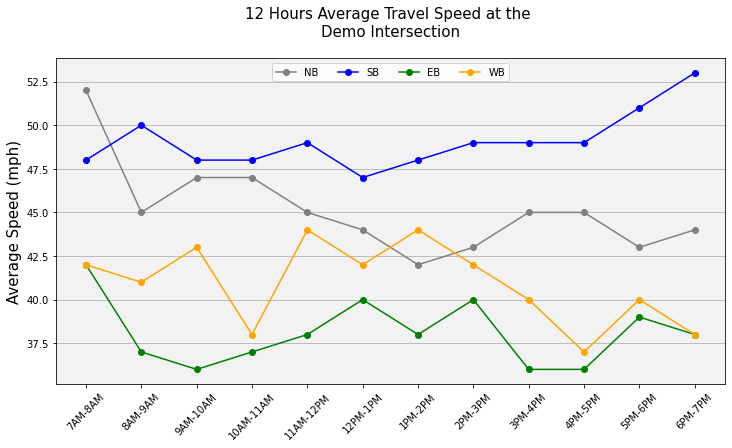

In [29]:
fig, ax = plt.subplots(figsize = (12,6))

plt.plot(np.arange(len(NB_Avg_Speed)),NB_Avg_Speed, linestyle='-', marker='o', color='grey')
plt.plot(np.arange(len(SB_Avg_Speed)),SB_Avg_Speed, linestyle='-', marker='o', color='blue')
plt.plot(np.arange(len(EB_Avg_Speed)),EB_Avg_Speed, linestyle='-', marker='o', color='green')
plt.plot(np.arange(len(WB_Avg_Speed)),WB_Avg_Speed, linestyle='-', marker='o', color='orange')

# plt.xlabel('Time',fontsize=15)
plt.ylabel('Average Speed (mph)',fontsize=15) 
plt.xticks(np.arange(len(Timekeys_Hour)),Timekeys_Hour,rotation=45)
plt.legend(['NB','SB','EB','WB'],loc='upper center',ncol=4) 

ax.patch.set_facecolor('grey')
ax.patch.set_alpha(0.1)
plt.grid(axis='y')
plt.title('12 Hours Average Travel Speed at the \n'+LocationName, y=1.05,fontsize=15)

# Step 4: Level-of-service

<a id='level-of-service'></a>
[[back to top](#3_vehicle_operation_analysis)]

# Step 5: Pedestrian gap analysis

<a id='pedestrian-gap-analysis'></a>
[[back to top](#3_vehicle_operation_analysis)]